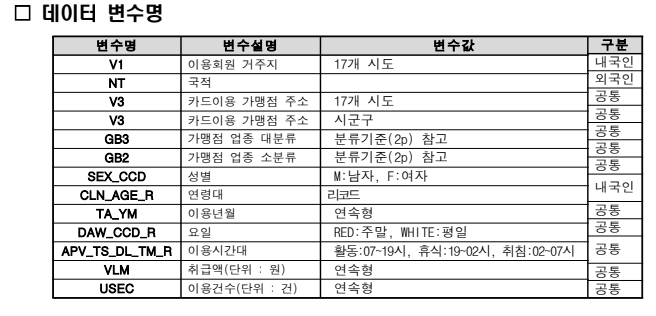

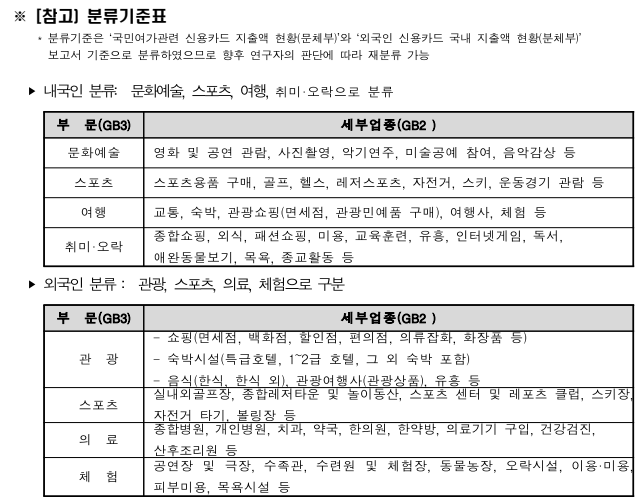

In [ ]:
# pd.set_option('display.float_format', '{:.4f}'.format) # 항상 float 형식으로
# pd.set_option('display.float_format', '{:.2e}'.format) # 항상 사이언티픽
# pd.set_option('display.float_format', '${:.2g}'.format)  # 적당히 알아서
# pd.set_option('display.float_format', None) # 다시 되돌리기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
sns.set_style('whitegrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


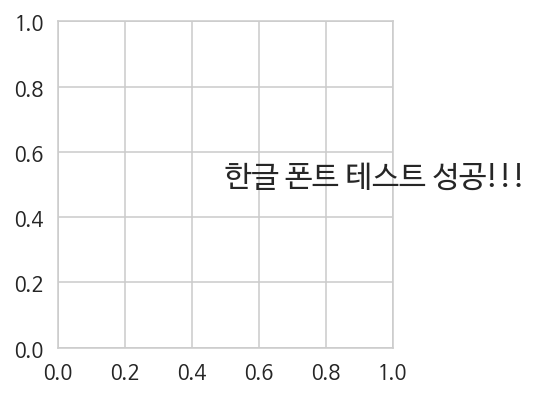

In [ ]:
# 그래프 한글폰트 사용설정 in Colab

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fontpath = '/content/drive/My Drive/파이썬/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

## Test
plt.figure(figsize=(3,3))
plt.text(0.5, 0.5, '한글 폰트 테스트 성공!!!', size=15)
plt.show()

In [ ]:
df = pd.read_table('/content/drive/MyDrive/2021 문화관광/DataSet/NATIVE_RE.txt', sep='|',error_bad_lines=True,dtype={'cln_age_r':np.str})

In [ ]:
df.head()

,v1,v2,v3,gb3,gb2,sex_ccd,cln_age_r,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec
0,세종,세종,.,취미오락,외식,M,30,201701,RED,활동,351296766,19010
1,세종,세종,.,취미오락,종합쇼핑,M,50,201701,RED,휴식,72244196,2375
2,세종,세종,.,취미오락,종합쇼핑,M,30,201701,WHITE,휴식,532911085,19979
3,충남,세종,.,취미오락,종합쇼핑,M,50,201701,WHITE,활동,50972534,951
4,충남,세종,.,취미오락,종합쇼핑,M,40,201701,RED,휴식,19104457,408


In [ ]:
df.columns = ['회원거주지', '가맹점주소', '시군구', '업종대분류', '업종소분류', '성별', '연령대', '이용연월','요일', '이용시간대', '취급액', '이용건수']

In [ ]:
df.columns

Index(['회원거주지', '가맹점주소', '시군구', '업종대분류', '업종소분류', '성별', '연령대', '이용연월', '요일',
       '이용시간대', '취급액', '이용건수'],
      dtype='object')

In [ ]:
df = df.loc[(df['업종대분류'] == '여행') & (df['회원거주지'] != df['가맹점주소'])] # 여행데이터만 추출

In [ ]:
# 이용연도 2019~2021년까지 추출(정렬 먼저)
df.sort_values(by='이용연월', inplace=True)
df = df.loc[df['이용연월'] >= 201901]
df['이용연월'] = df['이용연월'].astype('str')
df.head()

,회원거주지,가맹점주소,시군구,업종대분류,업종소분류,성별,연령대,이용연월,요일,이용시간대,취급액,이용건수
25185634,경북,대구,중구,여행,체험,F,60,201901,RED,휴식,60360,15
25185629,강원,부산,중구,여행,교통,M,60,201901,RED,활동,41749,5
25185626,경남,부산,중구,여행,숙박,F,60,201901,RED,취침,251500,5
25185608,경기,대구,중구,여행,숙박,F,40,201901,RED,활동,4818740,15
25185605,울산,서울,중구,여행,숙박,M,50,201901,WHITE,휴식,422520,10


In [36]:
pd.set_option('display.float_format', '{:.4f}'.format)
df.describe()
df[df['취급액'] == 10508464541]

,회원거주지,가맹점주소,시군구,업종대분류,업종소분류,성별,연령대,이용연월,요일,이용시간대,취급액,이용건수
34961020,강원,서울,강서구,여행,교통,M,30,201911,WHITE,활동,10508464541,846


In [45]:
df.loc[(df['회원거주지'] == '강원') & (df['가맹점주소'] == '서울') & (df['시군구'] == '강서구') & (df['업종대분류'] == '여행')&(df['업종소분류']=='교통')]

,회원거주지,가맹점주소,시군구,업종대분류,업종소분류,성별,연령대,이용연월,요일,이용시간대,취급액,이용건수
25175048,강원,서울,강서구,여행,교통,F,60,201901,RED,활동,2347501,20
25151596,강원,서울,강서구,여행,교통,M,50,201901,RED,휴식,14061365,50
25164223,강원,서울,강서구,여행,교통,F,30,201901,RED,휴식,25300397,85
25237207,강원,서울,강서구,여행,교통,F,30,201901,WHITE,휴식,95159350,347
25252823,강원,서울,강서구,여행,교통,M,20,201901,WHITE,취침,4959077,45
...,...,...,...,...,...,...,...,...,...,...,...,...
47001836,강원,서울,강서구,여행,교통,F,20,202105,RED,휴식,12463374,127
50857938,강원,서울,강서구,여행,교통,M,30,202105,WHITE,활동,73165034,809
43258082,강원,서울,강서구,여행,교통,F,40,202105,RED,휴식,12800332,76
48883138,강원,서울,강서구,여행,교통,F,20,202105,WHITE,휴식,49487016,519


In [ ]:
# 결측치 비율 확인
np.round(df.isna().sum()/df.shape[0],3)

회원거주지    0.005
가맹점주소    0.000
시군구      0.000
업종대분류    0.000
업종소분류    0.000
성별       0.000
연령대      0.000
이용연월     0.000
요일       0.000
이용시간대    0.000
취급액      0.000
이용건수     0.000
dtype: float64

In [ ]:
# 회원 거주지의 결측치가 가장 많지만 결측치 비율이 0.004으로 근소하다 생각하여 컷!
df.dropna(subset=['회원거주지','연령대'], how='any', axis=0, inplace=True)
df.isna().sum()

회원거주지    0
가맹점주소    0
시군구      0
업종대분류    0
업종소분류    0
성별       0
연령대      0
이용연월     0
요일       0
이용시간대    0
취급액      0
이용건수     0
dtype: int64

In [ ]:
print(df['회원거주지'].unique())
print(df['가맹점주소'].unique())

['경북' '강원' '경남' '경기' '울산' '서울' '인천' '부산' '제주' '전남' '충북' '대전' '대구' '세종'
 '전북' '충남' '광주']
['대구' '부산' '서울' '울산' '인천' '대전' '경기' '강원' '광주' '경남' '전북' '전남' '충남' '충북'
 '경북' '세종' '제주']


In [ ]:
df['업종소분류'].value_counts()

숙박      1835235
체험       468036
교통       372979
관광쇼핑     257515
여행사       81001
Name: 업종소분류, dtype: int64

In [ ]:
# 연도별로 나누기
df_2019 = df.loc[df['이용연월'].str.startswith('2019')].copy()
df_2020 = df.loc[df['이용연월'].str.startswith('2020')].copy()
df_2021 = df.loc[df['이용연월'].str.startswith('2021')].copy()

## 여행지별 이용금액

In [ ]:
pivot = pd.pivot_table(data = df, index = '가맹점주소', columns = '회원거주지', values = '이용건수', aggfunc='sum')
pivot

회원거주지,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
가맹점주소,,,,,,,,,,,,,,,,,
강원,NaN,6084107.0,206145.0,300436.0,94333.0,237008.0,256607.0,235908.0,5663739.0,82660.0,125308.0,1117755.0,81624.0,116472.0,50185.0,323709.0,513927.0
경기,2199695.0,NaN,3594940.0,963576.0,1101947.0,680904.0,1372151.0,1190556.0,9782120.0,180528.0,411452.0,3403132.0,1868783.0,1083376.0,173078.0,3201359.0,4032670.0
경남,75422.0,869351.0,NaN,242490.0,107546.0,332873.0,143090.0,927320.0,675653.0,36874.0,230206.0,177478.0,153059.0,95920.0,25777.0,124173.0,127176.0
경북,191919.0,1143809.0,405531.0,NaN,68733.0,804460.0,140946.0,554954.0,871386.0,38762.0,350954.0,232974.0,69114.0,65911.0,21079.0,131142.0,203382.0
광주,14413.0,230350.0,28504.0,16656.0,NaN,19105.0,25884.0,29441.0,179353.0,5016.0,12001.0,54564.0,282762.0,62496.0,13286.0,26098.0,20895.0
대구,29894.0,313181.0,120233.0,404136.0,23531.0,NaN,36295.0,106818.0,273085.0,8038.0,55135.0,64423.0,19527.0,18801.0,12307.0,32208.0,41110.0
대전,8918009.0,41393334.0,6419002.0,11891212.0,3389631.0,10165560.0,NaN,9332932.0,45912034.0,3643442.0,4514356.0,6212415.0,4628746.0,4960942.0,351451.0,10532933.0,5981685.0
부산,158659.0,2358640.0,1845055.0,511775.0,134407.0,558831.0,177494.0,NaN,2654730.0,43093.0,818545.0,620604.0,185097.0,107114.0,549816.0,171993.0,177118.0
서울,6123750.0,36896499.0,8761264.0,6093862.0,4505373.0,6211614.0,4573619.0,8883698.0,NaN,1384059.0,4858850.0,5636702.0,4489335.0,5422891.0,2657728.0,5254555.0,6665895.0


In [ ]:
columns = pivot.columns

for col in columns:
  print(str(col) +'에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2019~2021\n\n',pivot.sort_values(by=col, ascending=False)[col],'\n\n')

강원에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2019~2021

 가맹점주소
대전    8918009.0
서울    6123750.0
경기    2199695.0
제주     644151.0
인천     330887.0
경북     191919.0
부산     158659.0
충북     121710.0
충남      80662.0
전북      77035.0
경남      75422.0
전남      75124.0
대구      29894.0
광주      14413.0
울산      13028.0
세종       2891.0
강원          NaN
Name: 강원, dtype: float64 


경기에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2019~2021

 가맹점주소
대전    41393334.0
서울    36896499.0
제주     7932295.0
강원     6084107.0
인천     5105600.0
부산     2358640.0
충남     1648813.0
전북     1231732.0
경북     1143809.0
전남     1065850.0
경남      869351.0
충북      806162.0
대구      313181.0
광주      230350.0
울산      161334.0
세종       33893.0
경기           NaN
Name: 경기, dtype: float64 


경남에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2019~2021

 가맹점주소
서울    8761264.0
대전    6419002.0
경기    3594940.0
부산    1845055.0
제주    1170649.0
경북     405531.0
전남     298585.0
인천     206523.0
강원     206145.0
전북     171627.0
대구     120233.0
울산     117135.0
충남      92066.0
충북  

In [ ]:
df[['회원거주지', '이용건수']].groupby('회원거주지').sum().sort_values(by='회원거주지')['이용건수']

회원거주지
강원     19057249
경기    107274950
경남     23497697
경북     21927531
광주     11752309
대구     20665172
대전      8651243
부산     23645171
서울     82209919
세종      5982423
울산     12168576
인천     20575951
전남     12839260
전북     13274021
제주      4436429
충남     21449855
충북     19945797
Name: 이용건수, dtype: int64

### 연도별로 나누기 두두두둥

In [ ]:
pivot_2019 = pd.pivot_table(data = df_2019, index= '가맹점주소', columns = '회원거주지', values='이용건수', aggfunc='sum')
pivot_2020 = pd.pivot_table(data = df_2020, index= '가맹점주소', columns = '회원거주지', values='이용건수', aggfunc='sum')
pivot_2021 = pd.pivot_table(data = df_2021, index= '가맹점주소', columns = '회원거주지', values='이용건수', aggfunc='sum')

## 2019년 - 코로나 이전

In [ ]:
columns = pivot_2019.columns

for col in columns:
  print(str(col) +'에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2019\n\n',pivot_2019.sort_values(by=col, ascending=False).head()[col],'\n\n')

강원에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2019

 가맹점주소
대전    4718779.0
서울    3997461.0
경기     992290.0
제주     331541.0
인천     257708.0
Name: 강원, dtype: float64 


경기에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2019

 가맹점주소
대전    21364233.0
서울    21228561.0
제주     3589092.0
인천     3539858.0
강원     2935399.0
Name: 경기, dtype: float64 


경남에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2019

 가맹점주소
서울    5418086.0
대전    3457540.0
경기    1451968.0
부산    1066952.0
제주     575656.0
Name: 경남, dtype: float64 


경북에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2019

 가맹점주소
대전    6299030.0
서울    3635988.0
경기     475519.0
제주     386650.0
부산     330095.0
Name: 경북, dtype: float64 


광주에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2019

 가맹점주소
서울    2491864.0
대전    1740949.0
경기     469293.0
전남     460396.0
제주     394539.0
Name: 광주, dtype: float64 


대구에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2019

 가맹점주소
대전    5298751.0
서울    3428039.0
제주     447058.0
경북     384721.0
부산     355141.0
Name: 대구, dtype: float64 


대전에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림

In [ ]:
pd.options.display.max_columns = 500
category = df_2019['업종소분류'].value_counts().index
count = range(4)
for i in count:
  except_df_2019 = pd.pivot_table(data = df_2019[df_2019 != category[i]], index='가맹점주소', columns='회원거주지', values='이용건수')
  columns = except_df_2019.columns
  for col,i in zip(columns,count):
    print(str(category[i])+'을 제외한 ' + str(col) +'에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2019\n\n',except_df_2019.sort_values(by=col, ascending=False)[col].head(),'\n\n')

숙박을 제외한 강원에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2019

 가맹점주소
대전    2137.128170
서울     223.959942
제주     100.466970
경기      74.563420
인천      58.556692
Name: 강원, dtype: float64 


체험을 제외한 경기에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2019

 가맹점주소
대전    4921.500346
제주     764.287053
서울     572.630584
인천     337.065130
강원     167.068810
Name: 경기, dtype: float64 


교통을 제외한 경남에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2019

 가맹점주소
대전    1385.787575
서울     336.799030
제주     159.020994
경기     150.728537
부산      73.878410
Name: 경남, dtype: float64 


관광쇼핑을 제외한 경북에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2019

 가맹점주소
대전    2557.462444
서울     241.129253
제주     113.221083
경기      51.291015
인천      42.537318
Name: 경북, dtype: float64 


숙박을 제외한 강원에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2019

 가맹점주소
대전    2137.128170
서울     223.959942
제주     100.466970
경기      74.563420
인천      58.556692
Name: 강원, dtype: float64 


체험을 제외한 경기에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2019

 가맹점주소
대전    4921.500346
제주     764.287053
서울     572.6

## 교통을 제외한 연도비교

In [ ]:
category = df_2019['업종소분류'].value_counts().index[2]
except_df_2019 = pd.pivot_table(data = df_2019[df_2019 != category], index='가맹점주소', columns='회원거주지', values='이용건수')
columns = except_df_2019.columns
for col in columns:
  print(str(category)+'을 제외한 ' + str(col) +'에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2019\n\n',except_df_2019.sort_values(by=col, ascending=False).head()[col],'\n\n')

교통을 제외한 강원에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2019

 가맹점주소
대전    2137.128170
서울     223.959942
제주     100.466970
경기      74.563420
인천      58.556692
Name: 강원, dtype: float64 


교통을 제외한 경기에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2019

 가맹점주소
대전    4921.500346
제주     764.287053
서울     572.630584
인천     337.065130
강원     167.068810
Name: 경기, dtype: float64 


교통을 제외한 경남에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2019

 가맹점주소
대전    1385.787575
서울     336.799030
제주     159.020994
경기     150.728537
부산      73.878410
Name: 경남, dtype: float64 


교통을 제외한 경북에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2019

 가맹점주소
대전    2557.462444
서울     241.129253
제주     113.221083
경기      51.291015
인천      42.537318
Name: 경북, dtype: float64 


교통을 제외한 광주에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2019

 가맹점주소
대전    867.438465
서울    186.684447
제주    116.040882
경기     66.425053
인천     46.111034
Name: 광주, dtype: float64 


교통을 제외한 대구에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2019

 가맹점주소
대전    2386.824775
서울     232.630225
제주     127.113449
인

In [ ]:
category = df_2020['업종소분류'].value_counts().index[2]
except_df_2020 = pd.pivot_table(data = df_2020[df_2020 != category], index='가맹점주소', columns='회원거주지', values='이용건수')
columns = except_df_2020.columns
for col in columns:
  print(str(category)+'을 제외한 ' + str(col) +'에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2020\n\n',except_df_2020.sort_values(by=col, ascending=False).head()[col],'\n\n')

교통을 제외한 강원에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2020

 가맹점주소
대전    1701.949085
서울     126.131873
경기      83.707670
제주      76.301278
인천      19.865423
Name: 강원, dtype: float64 


교통을 제외한 경기에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2020

 가맹점주소
대전    3677.442464
제주     659.361493
서울     353.263433
강원     139.957113
인천     118.544229
Name: 경기, dtype: float64 


교통을 제외한 경남에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2020

 가맹점주소
대전    1045.578164
서울     223.864630
경기     203.838468
제주     127.093253
부산      48.854631
Name: 경남, dtype: float64 


교통을 제외한 경북에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2020

 가맹점주소
대전    2023.678274
서울     173.170662
제주      94.639820
경기      48.400831
대구      22.719935
Name: 경북, dtype: float64 


교통을 제외한 광주에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2020

 가맹점주소
대전    714.142502
서울    160.607437
제주    103.282705
경기     86.446380
전남     31.310888
Name: 광주, dtype: float64 


교통을 제외한 대구에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2020

 가맹점주소
대전    1925.688776
서울     191.610506
제주     124.595806
경

In [ ]:
category = df_2021['업종소분류'].value_counts().index[2]
except_df_2021 = pd.pivot_table(data = df_2021[df_2021 != category], index='가맹점주소', columns='회원거주지', values='이용건수')
columns = except_df_2021.columns
for col in columns:
  print(str(category)+'을 제외한 ' + str(col) +'에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2021\n\n',except_df_2021.sort_values(by=col, ascending=False).head()[col],'\n\n')

교통을 제외한 강원에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2021

 가맹점주소
대전    1712.200000
서울     110.794046
제주      80.323457
경기      66.700456
충북      17.520140
Name: 강원, dtype: float64 


교통을 제외한 경기에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2021

 가맹점주소
대전    3778.122166
제주     790.017279
서울     386.521817
강원     129.027139
인천     100.345220
Name: 경기, dtype: float64 


교통을 제외한 경남에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2021

 가맹점주소
대전    1008.998819
서울     204.412653
경기     170.151939
제주     145.368499
부산      53.519601
Name: 경남, dtype: float64 


교통을 제외한 경북에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2021

 가맹점주소
대전    2206.006494
서울     174.902922
제주     111.181606
경기      41.478630
대구      21.981873
Name: 경북, dtype: float64 


교통을 제외한 광주에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2021

 가맹점주소
대전    782.898438
서울    167.173962
제주    124.044496
경기     70.540858
전남     30.066014
Name: 광주, dtype: float64 


교통을 제외한 대구에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2021

 가맹점주소
대전    1936.619236
서울     213.448435
제주     158.136029
경

## 업종별 하나씩 뽑아서 연도비교

In [28]:
# category = df_2021['업종소분류'].value_counts().index[2]
# except_df_2021 = pd.pivot_table(data = df_2021[df_2021 != category], index='가맹점주소', columns='회원거주지', values='이용건수')
# columns = except_df_2021.columns
# for col in columns:
#   print(str(category)+'을 제외한 ' + str(col) +'에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2021\n\n',except_df_2021.sort_values(by=col, ascending=False).head()[col],'\n\n')


values = df_2019['업종소분류'].value_counts().index
values = values[values =='체험']
choose_value_df_2019 = pd.pivot_table(data = df_2019[df_2019['업종소분류'] == '체험'], index = '가맹점주소', columns='회원거주지', values='이용건수',aggfunc='sum')
for col in choose_value_df_2019.columns:
  print(str(col) + '에 거주하는 이용객_2019_체험학습\n\n', choose_value_df_2019.sort_values(by=col, ascending = False).head()[col], '\n\n')

강원에 거주하는 이용객_2019_체험학습

 가맹점주소
경기    64702.0
서울    61490.0
경북    37500.0
제주    26234.0
충북    20460.0
Name: 강원, dtype: float64 


경기에 거주하는 이용객_2019_체험학습

 가맹점주소
서울    1143799.0
강원     279769.0
제주     245164.0
충남     221991.0
인천     193868.0
Name: 경기, dtype: float64 


경남에 거주하는 이용객_2019_체험학습

 가맹점주소
부산    130771.0
경북     62652.0
전남     58230.0
제주     39184.0
경기     31083.0
Name: 경남, dtype: float64 


경북에 거주하는 이용객_2019_체험학습

 가맹점주소
대구    81739.0
부산    41055.0
경기    35107.0
제주    27082.0
강원    27075.0
Name: 경북, dtype: float64 


광주에 거주하는 이용객_2019_체험학습

 가맹점주소
전남    225736.0
전북     29921.0
제주     22721.0
서울     17046.0
경기     15926.0
Name: 광주, dtype: float64 


대구에 거주하는 이용객_2019_체험학습

 가맹점주소
경북    116181.0
경남     39126.0
부산     37266.0
제주     28148.0
전남     22152.0
Name: 대구, dtype: float64 


대전에 거주하는 이용객_2019_체험학습

 가맹점주소
충남    52693.0
서울    38575.0
경기    29594.0
전북    23227.0
전남    23172.0
Name: 대전, dtype: float64 


부산에 거주하는 이용객_2019_체험학습

 가맹점주소
경남    123352.0
경북     84762.0
제주     3485

In [29]:
choose_value_df_2020 = pd.pivot_table(data = df_2020[df_2020['업종소분류'] == '체험'], index = '가맹점주소', columns='회원거주지', values='이용건수',aggfunc='sum')
for col in choose_value_df_2020.columns:
  print(str(col) + '에 거주하는 이용객_2020_체험활동\n\n', choose_value_df_2020.sort_values(by=col, ascending = False).head()[col], '\n\n')

강원에 거주하는 이용객_2020_체험활동

 가맹점주소
경기    27258.0
서울    24207.0
경북    20429.0
충북    17536.0
제주    15430.0
Name: 강원, dtype: float64 


경기에 거주하는 이용객_2020_체험활동

 가맹점주소
서울    625557.0
강원    217026.0
충남    188735.0
제주    182022.0
인천    147018.0
Name: 경기, dtype: float64 


경남에 거주하는 이용객_2020_체험활동

 가맹점주소
부산    61924.0
전남    43224.0
경북    35152.0
제주    23885.0
경기    11277.0
Name: 경남, dtype: float64 


경북에 거주하는 이용객_2020_체험활동

 가맹점주소
대구    30265.0
부산    21141.0
경남    19702.0
제주    18961.0
전남    16998.0
Name: 경북, dtype: float64 


광주에 거주하는 이용객_2020_체험활동

 가맹점주소
전남    135485.0
전북     29544.0
제주     17900.0
경남     11410.0
서울      7054.0
Name: 광주, dtype: float64 


대구에 거주하는 이용객_2020_체험활동

 가맹점주소
경북    94988.0
경남    33527.0
제주    22990.0
부산    21378.0
전남    17812.0
Name: 대구, dtype: float64 


대전에 거주하는 이용객_2020_체험활동

 가맹점주소
충남    39524.0
전남    21230.0
충북    17330.0
서울    16536.0
제주    15006.0
Name: 대전, dtype: float64 


부산에 거주하는 이용객_2020_체험활동

 가맹점주소
경남    77991.0
경북    51184.0
제주    30034.0
전남    28306.0


In [30]:
choose_value_df_2021 = pd.pivot_table(data = df_2021[df_2021['업종소분류'] == '체험'], index = '가맹점주소', columns='회원거주지', values='이용건수',aggfunc='sum')
for col in choose_value_df_2021.columns:
  print(str(col) + '에 거주하는 이용객_2021_체험활동\n\n', choose_value_df_2021.sort_values(by=col, ascending = False).head()[col], '\n\n')

강원에 거주하는 이용객_2021_체험활동

 가맹점주소
경기    17964.0
서울    12902.0
충북    10603.0
경북     9898.0
제주     8032.0
Name: 강원, dtype: float64 


경기에 거주하는 이용객_2021_체험활동

 가맹점주소
서울    325190.0
제주    100122.0
충남     84727.0
강원     80342.0
인천     79123.0
Name: 경기, dtype: float64 


경남에 거주하는 이용객_2021_체험활동

 가맹점주소
부산    26477.0
경북    21150.0
전남    13958.0
제주    13288.0
경기     5226.0
Name: 경남, dtype: float64 


경북에 거주하는 이용객_2021_체험활동

 가맹점주소
대구    12054.0
제주    10550.0
부산    10235.0
경남     8976.0
경기     7290.0
Name: 경북, dtype: float64 


광주에 거주하는 이용객_2021_체험활동

 가맹점주소
전남    61649.0
전북    10608.0
제주     9415.0
경남     4904.0
부산     3215.0
Name: 광주, dtype: float64 


대구에 거주하는 이용객_2021_체험활동

 가맹점주소
경북    53381.0
경남    16627.0
제주    12512.0
부산    11804.0
전남     5899.0
Name: 대구, dtype: float64 


대전에 거주하는 이용객_2021_체험활동

 가맹점주소
충남    16672.0
충북    13711.0
전북     9844.0
제주     8577.0
전남     8545.0
Name: 대전, dtype: float64 


부산에 거주하는 이용객_2021_체험활동

 가맹점주소
경북    41877.0
경남    30830.0
제주    15917.0
전남     8871.0
경기   

In [ ]:
#v1 v2 - 전처리 

In [ ]:
# 거주지가 경기인사람- 
df.loc[df['회원거주지'] == '경기']

,회원거주지,가맹점주소,시군구,업종대분류,업종소분류,성별,연령대,이용연월,요일,이용시간대,취급액,이용건수
25185608,경기,대구,중구,여행,숙박,F,40,201901,RED,활동,4818740,15
25185602,경기,울산,중구,여행,숙박,F,50,201901,RED,활동,578450,5
25185564,경기,대구,중구,여행,숙박,M,50,201901,WHITE,휴식,251500,5
25185737,경기,강원,강릉시,여행,교통,M,40,201901,WHITE,활동,1237380,5
25185295,경기,인천,동구,여행,숙박,F,60,201901,WHITE,휴식,150900,5
...,...,...,...,...,...,...,...,...,...,...,...,...
44672463,경기,서울,은평구,여행,숙박,M,20,202105,WHITE,활동,2402480,91
51837147,경기,전남,장성군,여행,체험,M,60,202105,RED,활동,61080,10
48867677,경기,인천,미추홀구,여행,체험,M,50,202105,WHITE,활동,221415,15
46961763,경기,부산,기장군,여행,숙박,F,50,202105,WHITE,활동,9073026,142


In [ ]:
columns = pivot_2020.columns

for col in columns:
  print(str(col) +'에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2020\n\n',pivot_2020.sort_values(by=col, ascending=False).head()[col],'\n\n')

강원에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2020

 가맹점주소
대전    2975007.0
서울    1582955.0
경기     914590.0
제주     215017.0
경북      62226.0
Name: 강원, dtype: float64 


경기에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2020

 가맹점주소
대전    14029443.0
서울    10946574.0
제주     2880091.0
강원     2307193.0
인천     1160548.0
Name: 경기, dtype: float64 


경남에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2020

 가맹점주소
서울    2477286.0
대전    2106840.0
경기    1607674.0
부산     552839.0
제주     399327.0
Name: 경남, dtype: float64 


경북에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2020

 가맹점주소
대전    3893557.0
서울    1769631.0
경기     360925.0
제주     273793.0
부산     132347.0
Name: 경북, dtype: float64 


광주에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2020

 가맹점주소
서울    1425391.0
대전    1147627.0
경기     476406.0
전남     364083.0
제주     303961.0
Name: 광주, dtype: float64 


대구에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2020

 가맹점주소
대전    3396915.0
서울    1951553.0
제주     386247.0
경북     289871.0
경기     261147.0
Name: 대구, dtype: float64 


대전에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림

In [ ]:
columns = pivot_2021.columns

for col in columns:
  print(str(col) +'에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2021\n\n',pivot_2021.sort_values(by=col, ascending=False).head()[col],'\n\n')

강원에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2021

 가맹점주소
대전    1224223.0
서울     543334.0
경기     292815.0
제주      97593.0
경북      28833.0
Name: 강원, dtype: float64 


경기에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2021

 가맹점주소
대전    5999658.0
서울    4721364.0
제주    1463112.0
강원     841515.0
부산     433550.0
Name: 경기, dtype: float64 


경남에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2021

 가맹점주소
서울    865892.0
대전    854622.0
경기    535298.0
부산    225264.0
제주    195666.0
Name: 경남, dtype: float64 


경북에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2021

 가맹점주소
대전    1698625.0
서울     688243.0
제주     142646.0
경기     127132.0
부산      49333.0
Name: 경북, dtype: float64 


광주에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2021

 가맹점주소
서울    588118.0
대전    501055.0
제주    158901.0
경기    156248.0
전남    141190.0
Name: 광주, dtype: float64 


대구에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2021

 가맹점주소
대전    1469894.0
서울     832022.0
제주     215065.0
경북     129868.0
경기      92045.0
Name: 대구, dtype: float64 


대전에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_2021

 가맹점주

In [ ]:
df_2021

,회원거주지,가맹점주소,시군구,업종대분류,업종소분류,성별,연령대,이용연월,요일,이용시간대,취급액,이용건수
50579985,울산,경기,양주시,여행,숙박,M,50,202101,RED,휴식,357700,5
49371207,인천,경기,여주시,여행,숙박,M,30,202101,WHITE,휴식,229950,5
49266535,충남,경남,진주시,여행,숙박,F,20,202101,WHITE,휴식,1022000,5
49651780,부산,경기,성남시,여행,교통,F,60,202101,RED,활동,4731860,459
50431350,경기,경남,거창군,여행,숙박,F,40,202101,RED,활동,204400,5
...,...,...,...,...,...,...,...,...,...,...,...,...
46962169,서울,충남,부여군,여행,숙박,M,30,202105,WHITE,활동,16401685,208
51836982,강원,울산,울주군,여행,숙박,M,50,202105,RED,휴식,178150,5
51836973,서울,경북,울릉군,여행,체험,F,30,202105,WHITE,활동,407200,40
50843771,서울,충북,음성군,여행,숙박,M,30,202105,RED,휴식,1170700,25
